In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
# Load the dataset
iris_df = pd.read_csv("IRIS.csv")

In [ ]:
# Check for null values
print(iris_df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# Scale the features
scaler = StandardScaler()
iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [ ]:
# Label encoding for species column
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)

In [ ]:
result_df = pd.DataFrame({'Original Species': label_encoder.inverse_transform(y_test), 'Predicted Species': y_pred_decoded})
print(result_df)

   Original Species Predicted Species
0   Iris-versicolor   Iris-versicolor
1       Iris-setosa       Iris-setosa
2    Iris-virginica    Iris-virginica
3   Iris-versicolor   Iris-versicolor
4   Iris-versicolor   Iris-versicolor
5       Iris-setosa       Iris-setosa
6   Iris-versicolor   Iris-versicolor
7    Iris-virginica    Iris-virginica
8   Iris-versicolor   Iris-versicolor
9   Iris-versicolor   Iris-versicolor
10   Iris-virginica    Iris-virginica
11      Iris-setosa       Iris-setosa
12      Iris-setosa       Iris-setosa
13      Iris-setosa       Iris-setosa
14      Iris-setosa       Iris-setosa
15  Iris-versicolor   Iris-versicolor
16   Iris-virginica    Iris-virginica
17  Iris-versicolor   Iris-versicolor
18  Iris-versicolor   Iris-versicolor
19   Iris-virginica    Iris-virginica
20      Iris-setosa       Iris-setosa
21   Iris-virginica    Iris-virginica
22      Iris-setosa       Iris-setosa
23   Iris-virginica    Iris-virginica
24   Iris-virginica    Iris-virginica
25   Iris-vi

In [ ]:
accuracy_percentage = accuracy_score(label_encoder.inverse_transform(y_test), y_pred_decoded)

In [ ]:
print(f'Accuracy Percentage: {accuracy_percentage * 100:.2f}%')

Accuracy Percentage: 100.00%


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

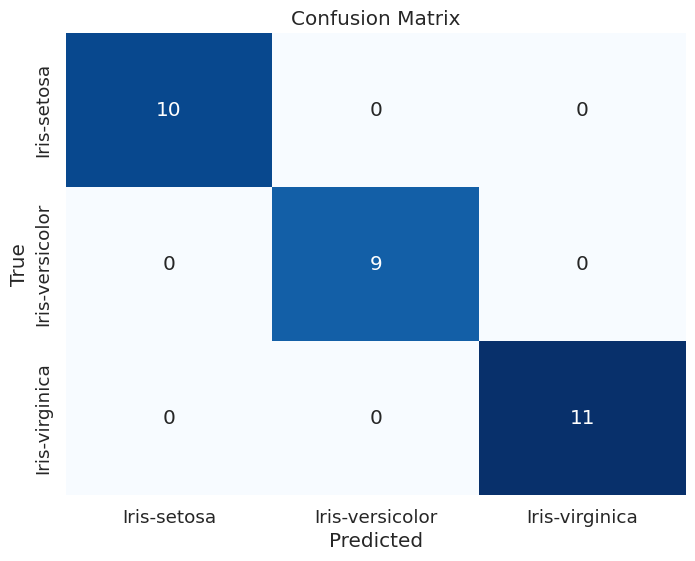

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(label_encoder.inverse_transform(y_test), y_pred_decoded)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

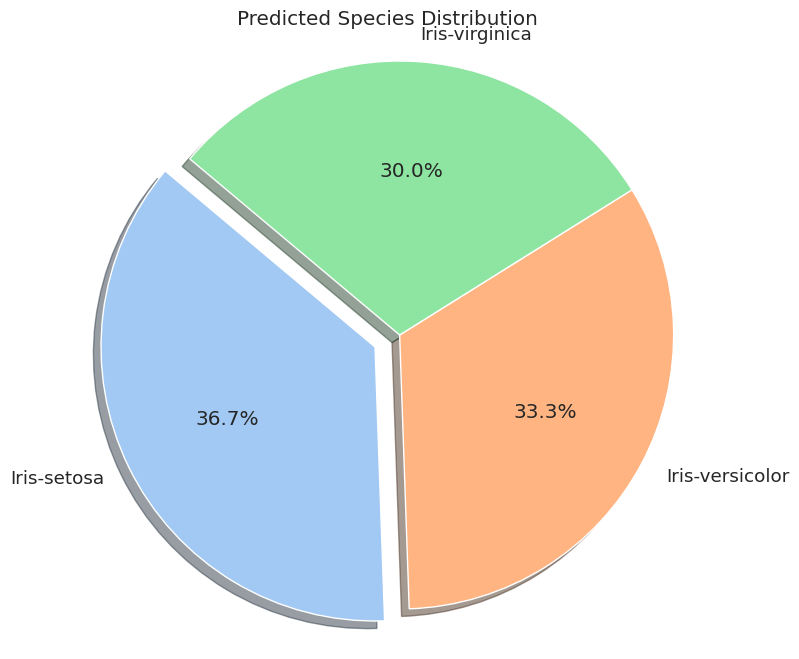

In [ ]:
# Pie chart
plt.figure(figsize=(8, 8))
labels = label_encoder.classes_
sizes = result_df['Predicted Species'].value_counts()
colors = sns.color_palette('pastel')[0:len(labels)]
explode = (0.1, 0, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predicted Species Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-22-52e07cc6c4ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted Species', data=result_df, palette='pastel')


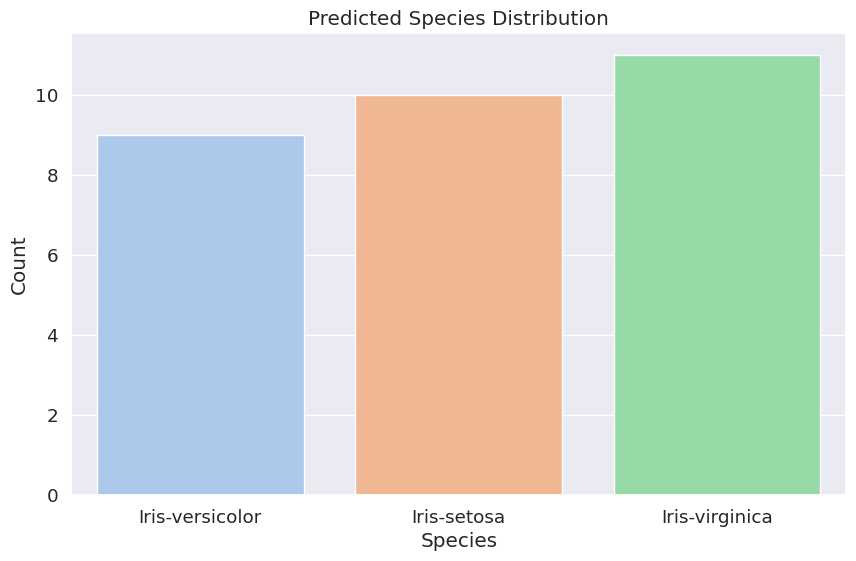

In [ ]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Predicted Species', data=result_df, palette='pastel')
plt.title('Predicted Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()